In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
# from sklearn.preprocessing import Imputer

%matplotlib inline

import pylab as pl


import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.grid_search import GridSearchCV
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

df = pd.read_csv('../../dataset/data/ethylene_CO.txt', delim_whitespace=True, skiprows=[0], header=None)
df = df.rename(columns = {0:'Time (seconds)', 1:'CO2 conc (ppm)', 2:'Ethylene conc (ppm)', 3:'Sensor1',4:'Sensor2',5:'Sensor3',6:'Sensor4',7:'Sensor5',8:'Sensor6',9:'Sensor7',10:'Sensor8',11:'Sensor9',12:'Sensor10',13:'Sensor11',14:'Sensor12',15:'Sensor13',16:'Sensor14',17:'Sensor15',18:'Sensor16'})


EDA: Explratory Data Analysis


In [3]:
df.head()

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
0,0.00,0.0,0.0,-50.85,-1.95,-41.82,1.30,-4.07,-28.73,-13.49,-3.25,55139.95,50669.50,9626.26,9762.62,24544.02,21420.68,7650.61,6928.42
1,0.01,0.0,0.0,-49.40,-5.53,-42.78,0.49,3.58,-34.55,-9.59,5.37,54395.77,50046.91,9433.20,9591.21,24137.13,20930.33,7498.79,6800.66
2,0.01,0.0,0.0,-40.04,-16.09,-27.59,0.00,-7.16,-42.14,-12.52,-5.86,53960.02,49299.30,9324.40,9449.81,23628.90,20504.94,7369.67,6697.47
3,0.03,0.0,0.0,-47.14,-10.57,-32.28,4.40,-11.22,-37.94,-7.16,-1.14,53047.71,48907.00,9170.64,9305.58,23101.66,20101.42,7285.13,6578.52
4,0.04,0.0,0.0,-33.58,-20.79,-33.25,6.03,3.42,-34.22,-14.46,8.31,52700.28,48330.96,9073.64,9163.47,22689.54,19694.07,7156.74,6468.32


Text(0, 0.5, 'CO conc (ppm)')

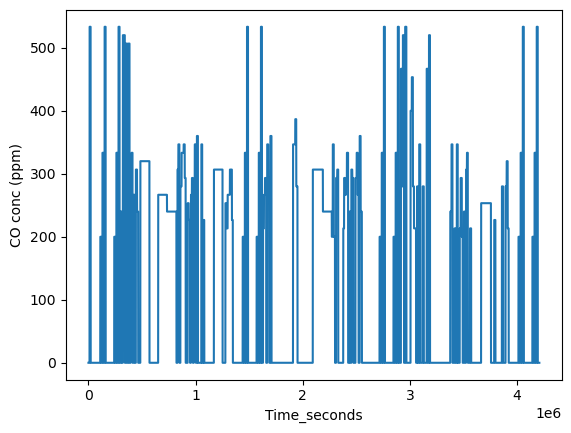

In [4]:
df['CO2 conc (ppm)'].plot.line()
plt.xlabel('Time_seconds')
plt.ylabel('CO conc (ppm)')

Text(0, 0.5, 'Ethylene conc (ppm)')

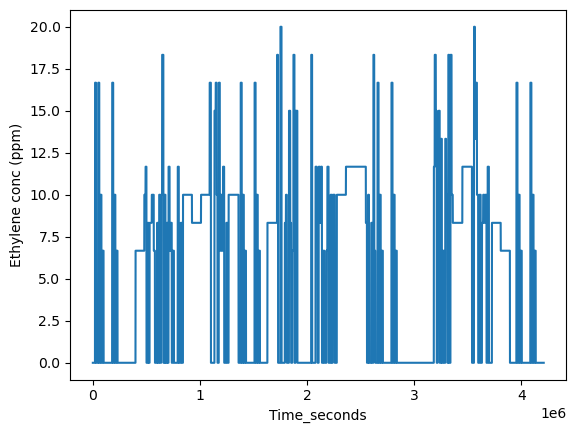

In [5]:
df['Ethylene conc (ppm)'].plot.line()
plt.xlabel('Time_seconds')
plt.ylabel('Ethylene conc (ppm)')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208261 entries, 0 to 4208260
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Time (seconds)       float64
 1   CO2 conc (ppm)       float64
 2   Ethylene conc (ppm)  float64
 3   Sensor1              float64
 4   Sensor2              float64
 5   Sensor3              float64
 6   Sensor4              float64
 7   Sensor5              float64
 8   Sensor6              float64
 9   Sensor7              float64
 10  Sensor8              float64
 11  Sensor9              float64
 12  Sensor10             float64
 13  Sensor11             float64
 14  Sensor12             float64
 15  Sensor13             float64
 16  Sensor14             float64
 17  Sensor15             float64
 18  Sensor16             float64
dtypes: float64(19)
memory usage: 610.0 MB


In [7]:
df.describe()

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
count,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06
mean,2.104459e+04,1.276202e+02,5.320436e+00,2.065617e+03,5.062184e+02,4.372539e+03,4.799250e+03,1.894957e+03,2.214692e+03,5.086639e+03,5.385428e+03,1.186241e+03,1.219252e+03,4.871079e+03,3.926250e+03,9.281877e+02,1.035772e+03,5.289323e+03,4.309685e+03
std,1.214998e+04,1.607772e+02,5.624127e+00,7.902609e+02,1.530128e+03,1.608018e+03,1.733017e+03,4.395373e+02,4.353987e+02,1.966451e+03,2.072383e+03,4.531719e+02,4.308765e+02,1.707681e+03,1.364496e+03,1.677561e+02,1.741085e+02,1.984057e+03,1.584038e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.262000e+01,-3.649000e+01,-4.504000e+01,-8.940000e+00,-1.219000e+01,-4.214000e+01,-2.322000e+01,-1.382000e+01,1.597400e+02,2.153100e+02,8.622200e+02,8.654900e+02,6.095700e+02,6.738900e+02,5.467300e+02,4.885800e+02
25%,1.052123e+04,0.000000e+00,0.000000e+00,1.323470e+03,9.120000e+00,2.986960e+03,3.282310e+03,1.503460e+03,1.856650e+03,3.241950e+03,3.448620e+03,9.343300e+02,9.419200e+02,3.435680e+03,2.728930e+03,8.083400e+02,9.102500e+02,3.642120e+03,2.805070e+03
50%,2.104591e+04,0.000000e+00,6.670000e+00,1.789090e+03,3.889000e+01,4.494330e+03,4.946720e+03,1.984550e+03,2.272780e+03,5.224880e+03,5.537910e+03,1.140320e+03,1.176600e+03,5.016130e+03,4.120240e+03,9.298600e+02,1.060700e+03,5.320550e+03,4.543040e+03
75%,3.156678e+04,2.666700e+02,1.000000e+01,2.869440e+03,1.589000e+02,5.658290e+03,6.178210e+03,2.262740e+03,2.566470e+03,6.719280e+03,7.104200e+03,1.543660e+03,1.557780e+03,6.126830e+03,4.967480e+03,1.033490e+03,1.161370e+03,6.739320e+03,5.565070e+03
max,4.208755e+04,5.333300e+02,2.000000e+01,3.553640e+03,2.811651e+04,8.641340e+03,9.221020e+03,2.904040e+03,3.502110e+03,9.883500e+03,1.052104e+04,5.513995e+04,5.066950e+04,9.626260e+03,9.762620e+03,2.454402e+04,2.142068e+04,1.066530e+04,7.874490e+03


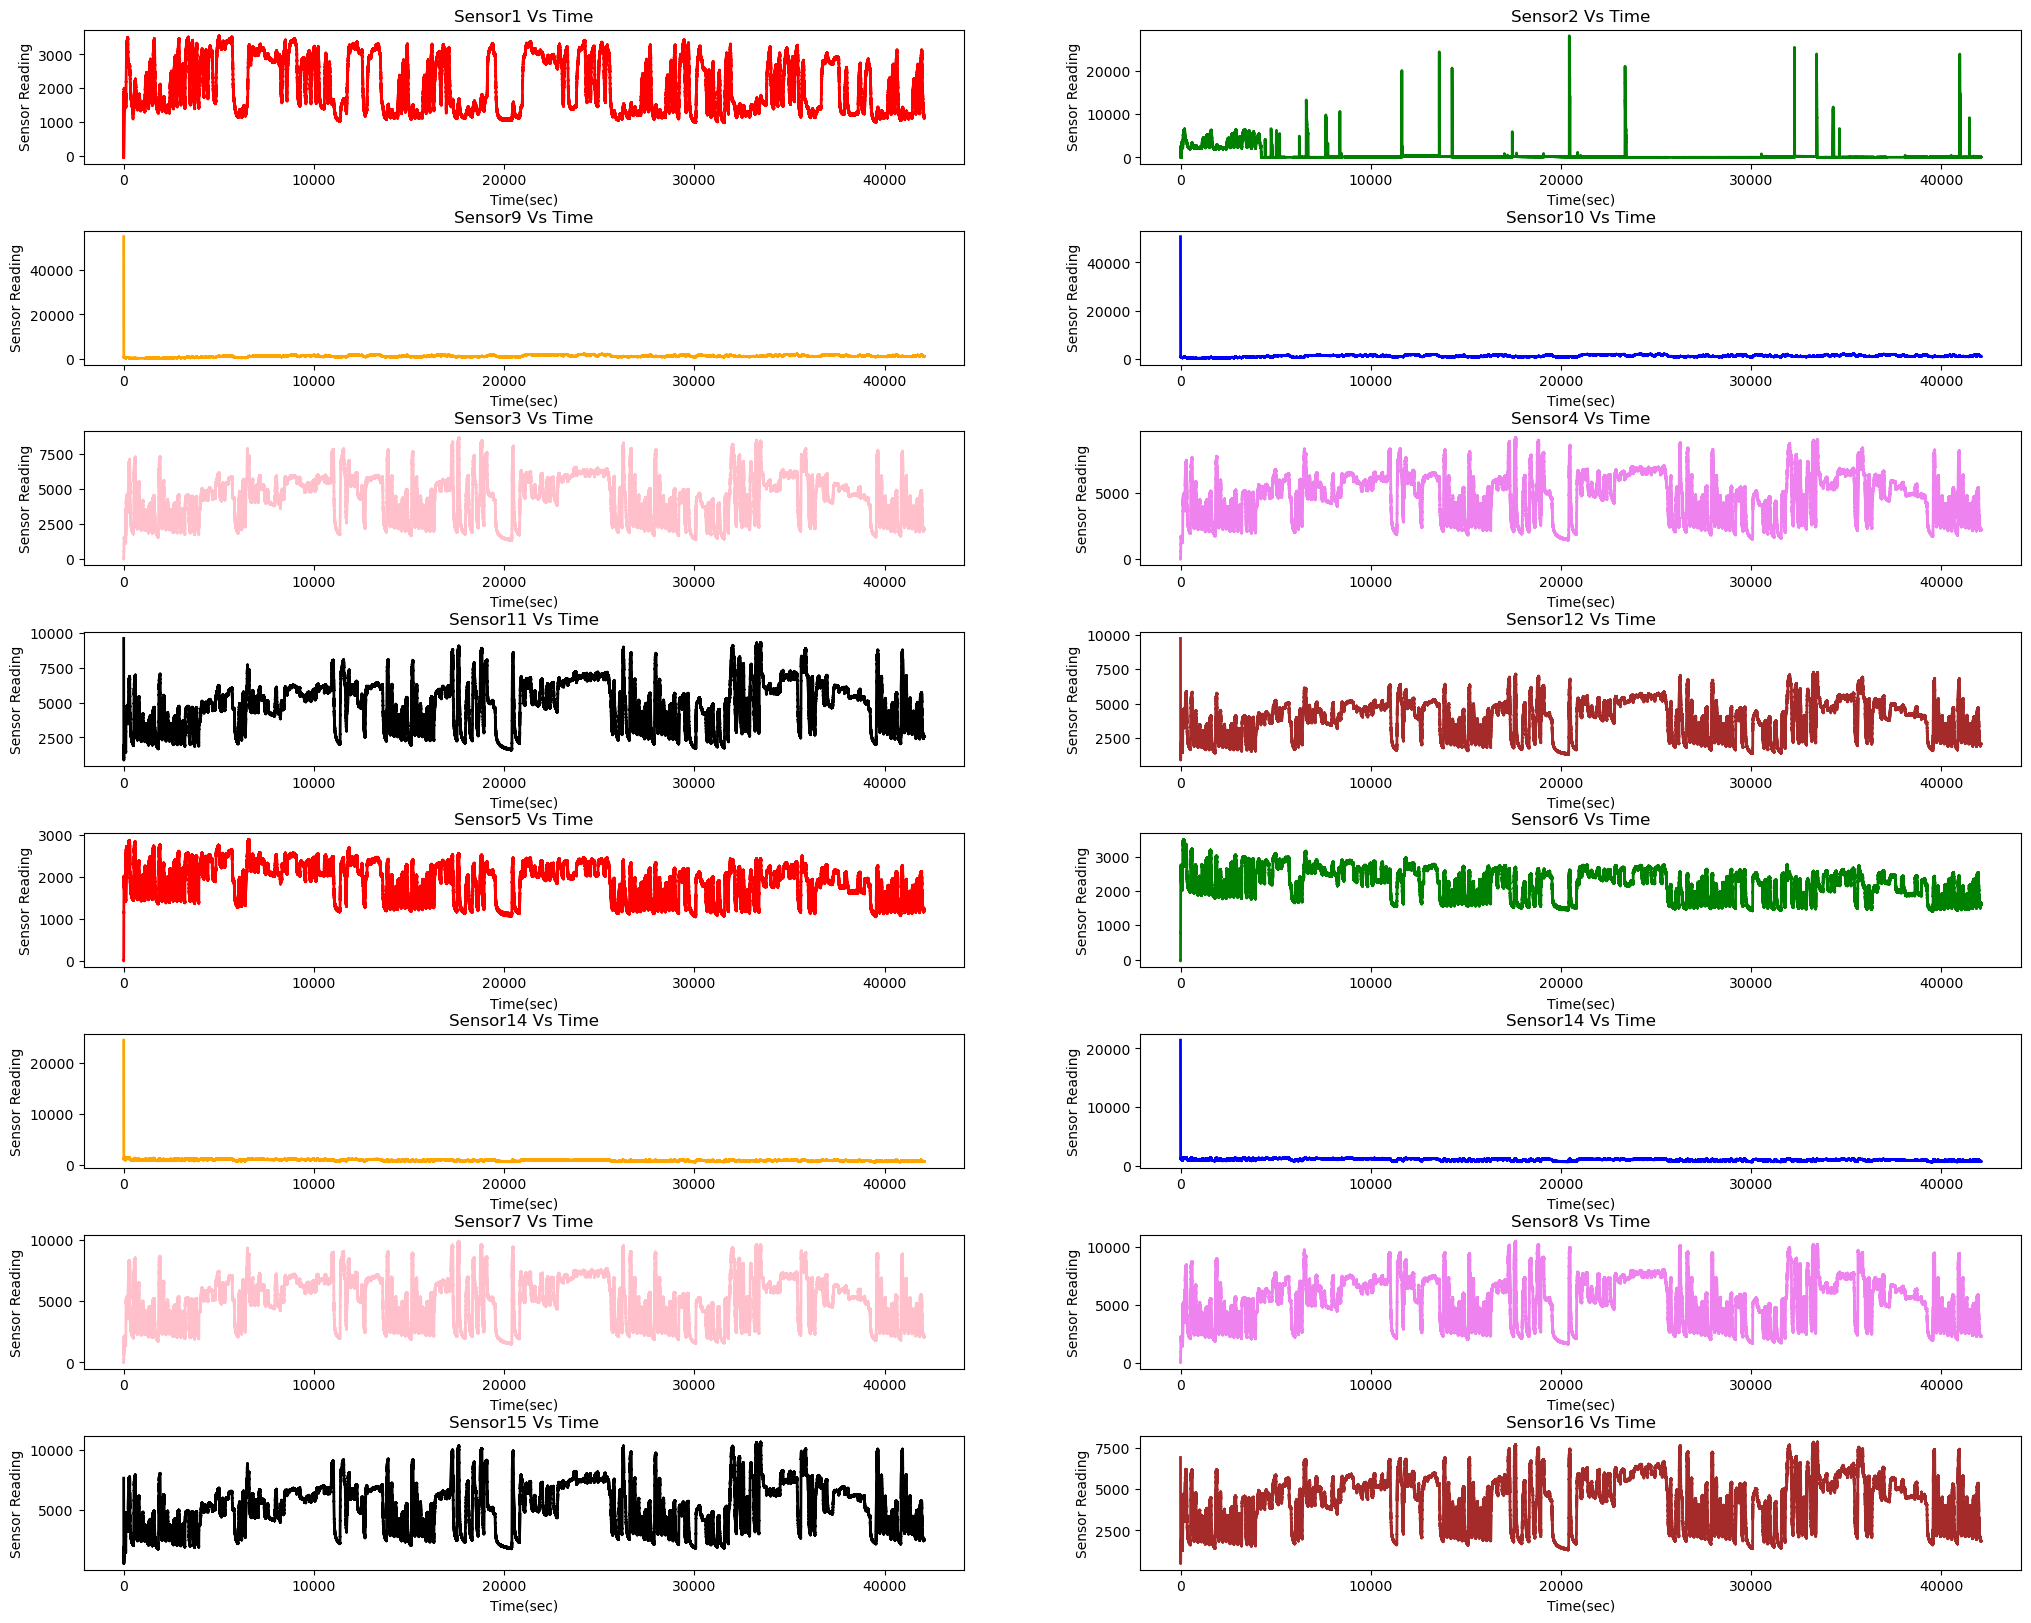

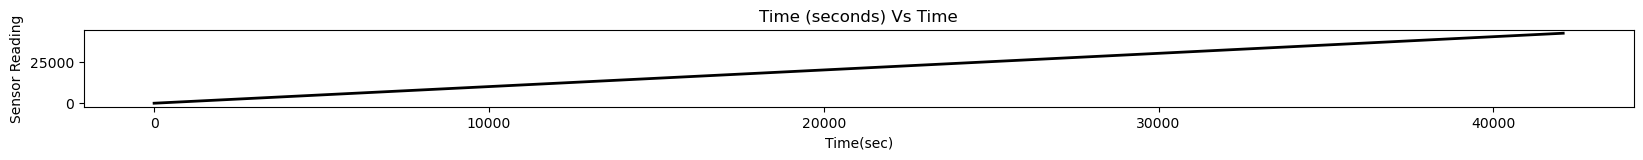

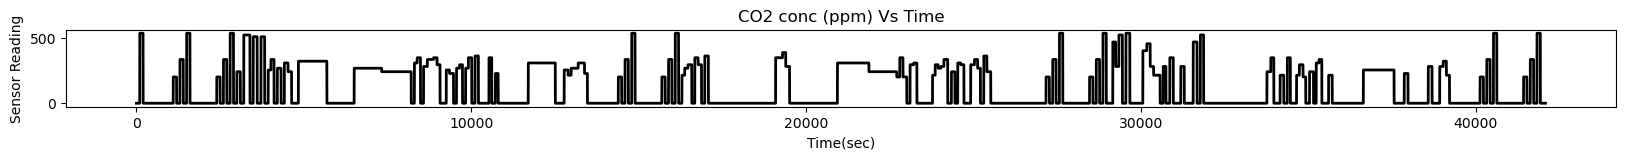

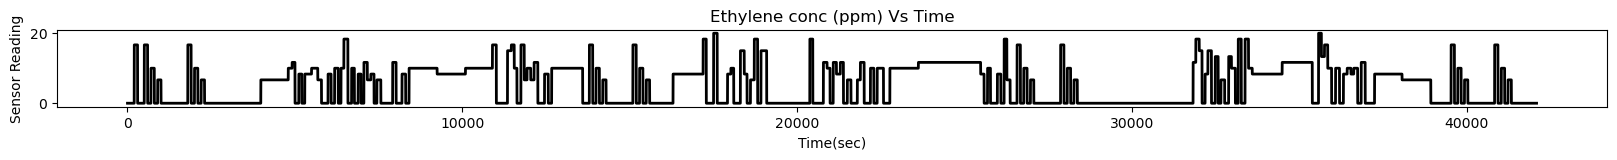

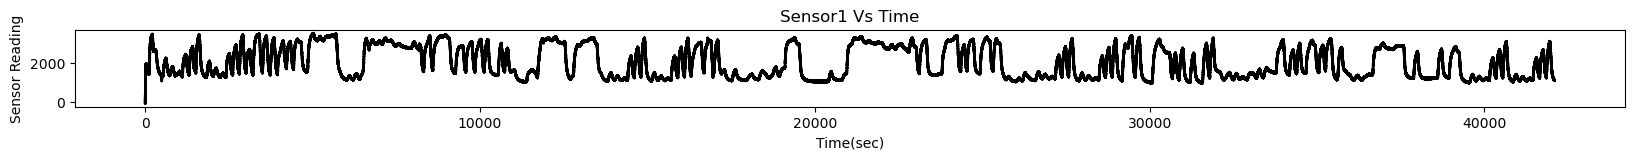

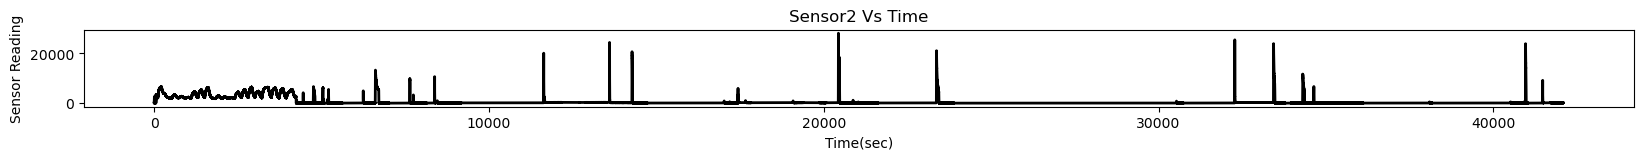

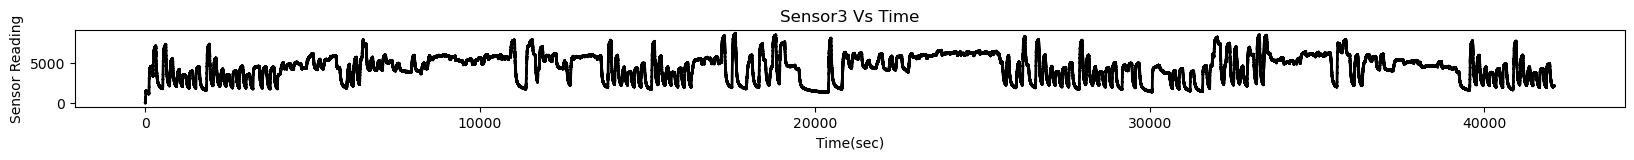

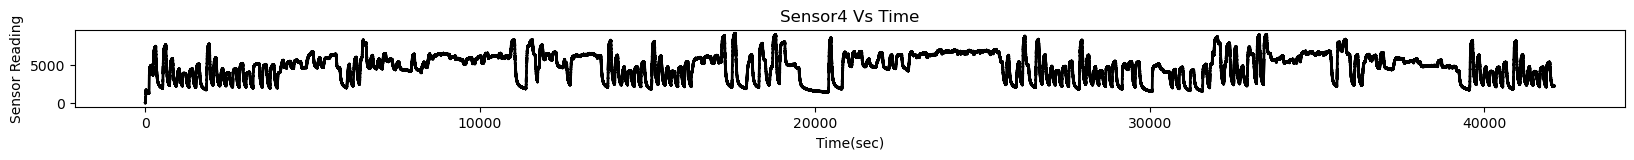

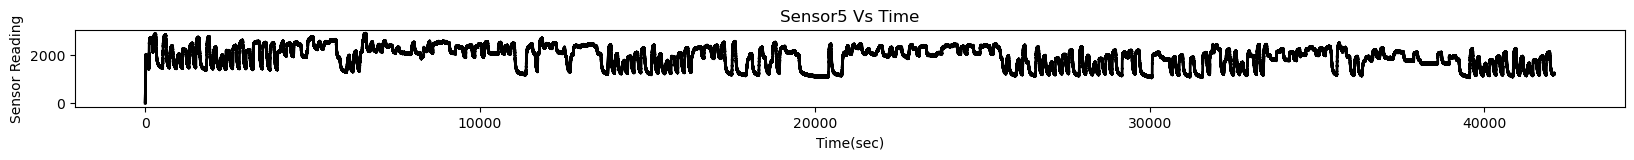

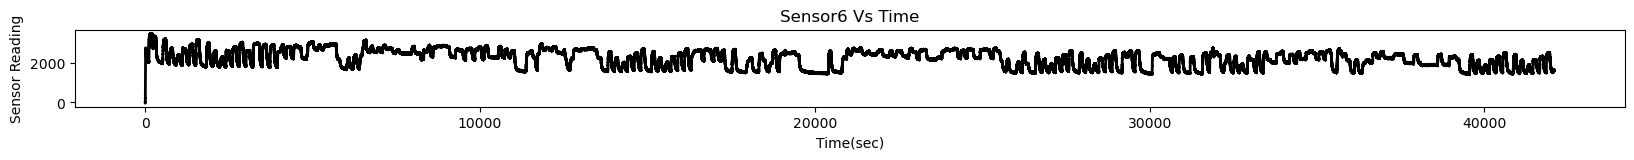

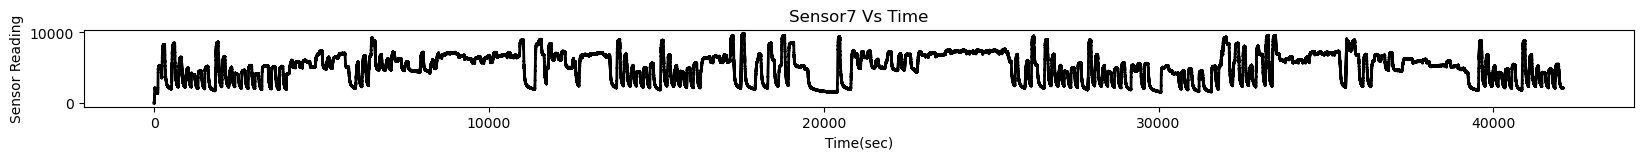

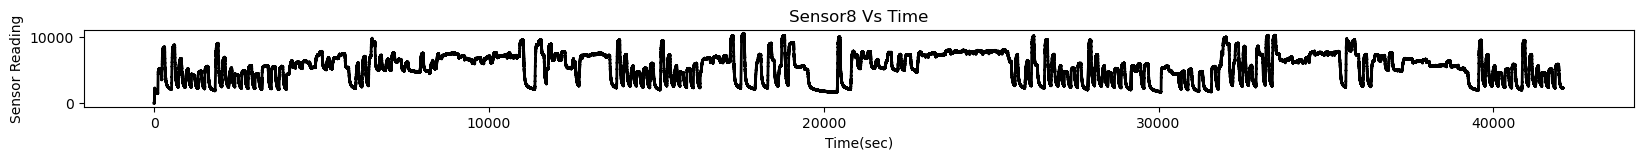

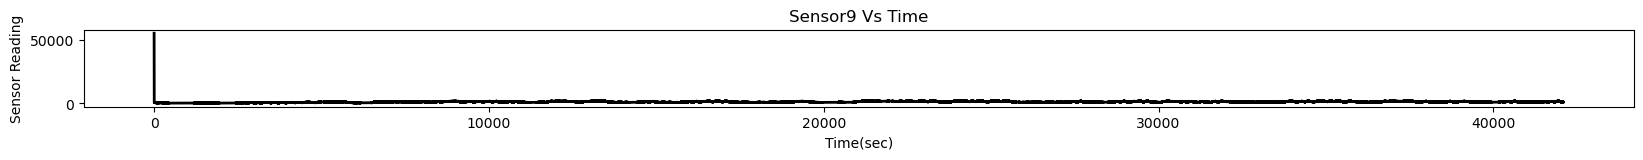

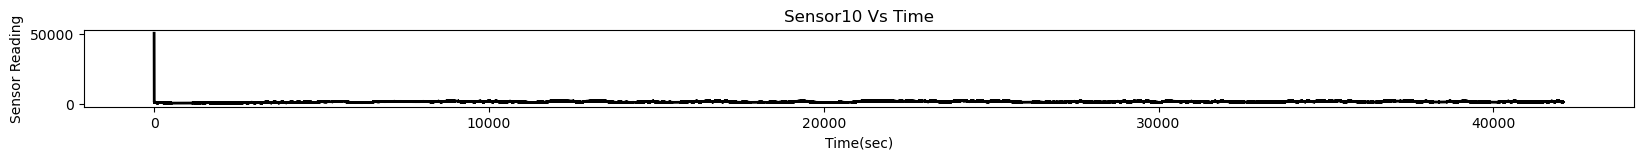

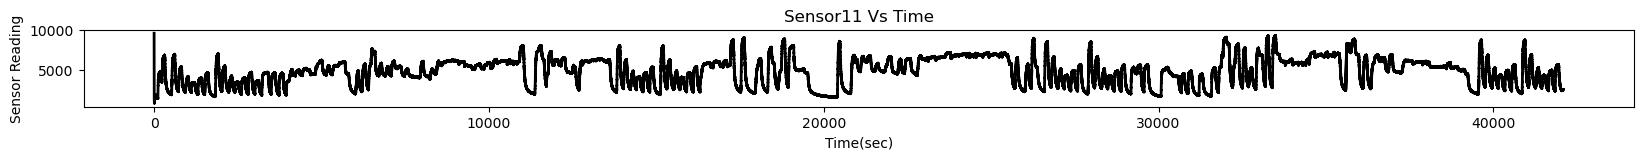

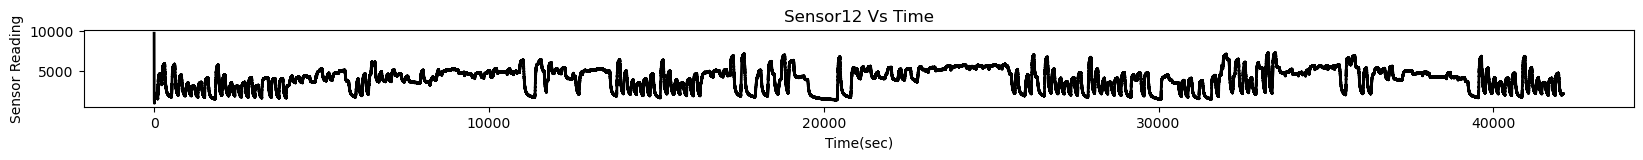

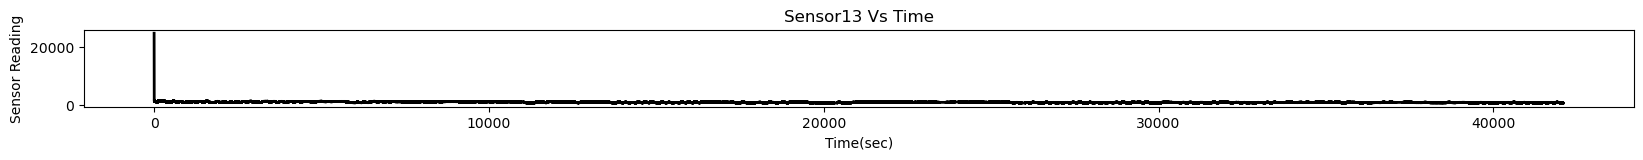

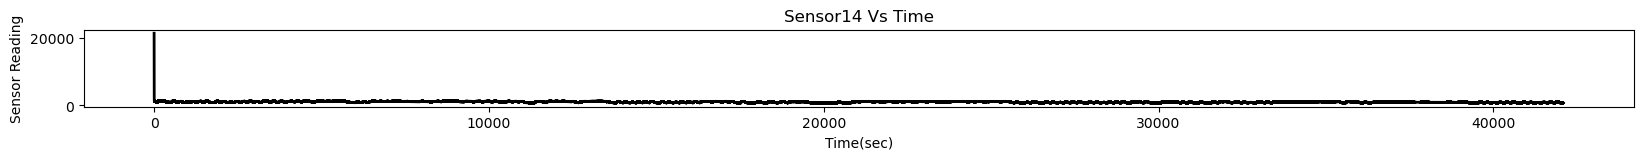

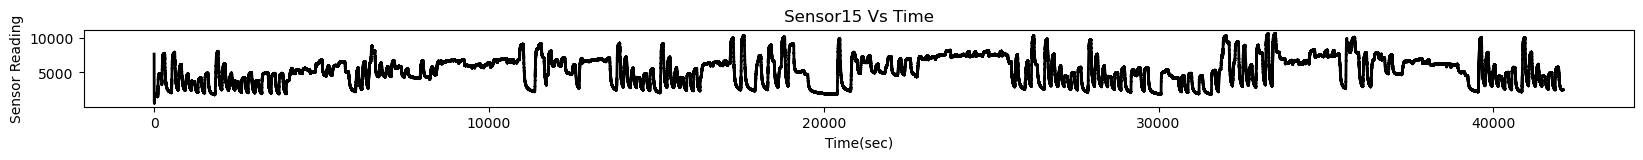

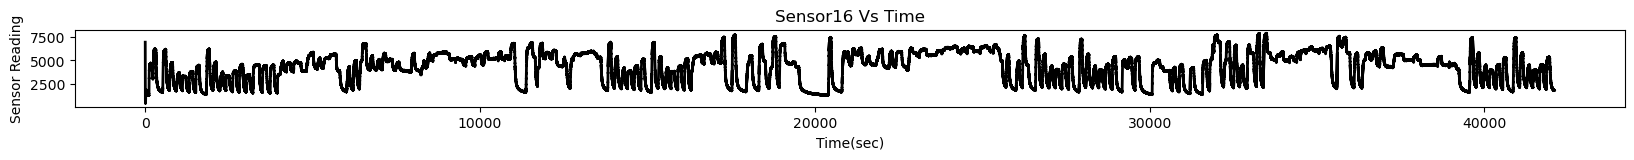

In [8]:
# Reference: https://github.com/shubham0420/Gas-Sensor-for-Home-Activity-Monitoring-Dataset/blob/master/code/main_code_notebook.ipynb

fig, axes = plt.subplots(nrows=8, ncols=2)#, sharex=True, sharey=True)
fig.set_figheight(20)
fig.set_figwidth(25)
fig.subplots_adjust(hspace=.5)


# TGS 2602 START #
axes[0,0].plot(df['Time (seconds)'], df['Sensor1'], c = 'red',linewidth = '2.0')
axes[0,0].set_title('Sensor1 Vs Time')
axes[0,0].set_xlabel('Time(sec)')
axes[0,0].set_ylabel('Sensor Reading')

axes[0,1].plot(df['Time (seconds)'], df['Sensor2'], c = 'green',linewidth = '2.0')
axes[0,1].set_title('Sensor2 Vs Time')
axes[0,1].set_xlabel('Time(sec)')
axes[0,1].set_ylabel('Sensor Reading')

axes[1,0].plot(df['Time (seconds)'], df['Sensor9'], c = 'orange',linewidth = '2.0')
axes[1,0].set_title('Sensor9 Vs Time')
axes[1,0].set_xlabel('Time(sec)')
axes[1,0].set_ylabel('Sensor Reading')

axes[1,1].plot(df['Time (seconds)'], df['Sensor10'], c = 'blue',linewidth = '2.0')
axes[1,1].set_title('Sensor10 Vs Time')
axes[1,1].set_xlabel('Time(sec)')
axes[1,1].set_ylabel('Sensor Reading')
# TGS 2602 END #

# TGS 2600 START #
axes[2,0].plot(df['Time (seconds)'], df['Sensor3'], c = 'pink',linewidth = '2.0')
axes[2,0].set_title('Sensor3 Vs Time')
axes[2,0].set_xlabel('Time(sec)')
axes[2,0].set_ylabel('Sensor Reading')

axes[2,1].plot(df['Time (seconds)'], df['Sensor4'], c = 'violet',linewidth = '2.0')
axes[2,1].set_title('Sensor4 Vs Time')
axes[2,1].set_xlabel('Time(sec)')
axes[2,1].set_ylabel('Sensor Reading')

axes[3,0].plot(df['Time (seconds)'], df['Sensor11'], c = 'black',linewidth = '2.0')
axes[3,0].set_title('Sensor11 Vs Time')
axes[3,0].set_xlabel('Time(sec)')
axes[3,0].set_ylabel('Sensor Reading')

axes[3,1].plot(df['Time (seconds)'], df['Sensor12'], c = 'brown',linewidth = '2.0')
axes[3,1].set_title('Sensor12 Vs Time')
axes[3,1].set_xlabel('Time(sec)')
axes[3,1].set_ylabel('Sensor Reading')

# TGS 2600 END #


# TGS 2610 START #
axes[4,0].plot(df['Time (seconds)'], df['Sensor5'], c = 'red',linewidth = '2.0')
axes[4,0].set_title('Sensor5 Vs Time')
axes[4,0].set_xlabel('Time(sec)')
axes[4,0].set_ylabel('Sensor Reading')

axes[4,1].plot(df['Time (seconds)'], df['Sensor6'], c = 'green',linewidth = '2.0')
axes[4,1].set_title('Sensor6 Vs Time')
axes[4,1].set_xlabel('Time(sec)')
axes[4,1].set_ylabel('Sensor Reading')

axes[5,0].plot(df['Time (seconds)'], df['Sensor13'], c = 'orange',linewidth = '2.0')
axes[5,0].set_title('Sensor14 Vs Time')
axes[5,0].set_xlabel('Time(sec)')
axes[5,0].set_ylabel('Sensor Reading')

axes[5,1].plot(df['Time (seconds)'], df['Sensor14'], c = 'blue',linewidth = '2.0')
axes[5,1].set_title('Sensor14 Vs Time')
axes[5,1].set_xlabel('Time(sec)')
axes[5,1].set_ylabel('Sensor Reading')
# TGS 2610 END #


# TGS 2620 START #
axes[6,0].plot(df['Time (seconds)'], df['Sensor7'], c = 'pink',linewidth = '2.0')
axes[6,0].set_title('Sensor7 Vs Time')
axes[6,0].set_xlabel('Time(sec)')
axes[6,0].set_ylabel('Sensor Reading')

axes[6,1].plot(df['Time (seconds)'], df['Sensor8'], c = 'violet',linewidth = '2.0')
axes[6,1].set_title('Sensor8 Vs Time')
axes[6,1].set_xlabel('Time(sec)')
axes[6,1].set_ylabel('Sensor Reading')

axes[7,0].plot(df['Time (seconds)'], df['Sensor15'], c = 'black',linewidth = '2.0')
axes[7,0].set_title('Sensor15 Vs Time')
axes[7,0].set_xlabel('Time(sec)')
axes[7,0].set_ylabel('Sensor Reading')

axes[7,1].plot(df['Time (seconds)'], df['Sensor16'], c = 'brown',linewidth = '2.0')
axes[7,1].set_title('Sensor16 Vs Time')
axes[7,1].set_xlabel('Time(sec)')
axes[7,1].set_ylabel('Sensor Reading')
# TGS 2620 END #

# write above code in a for loop
# full width graph with random colors

for sensor in df:
    plt.figure(figsize=(20,1))
    plt.plot(df['Time (seconds)'], df[sensor], c = 'black' , linewidth = '2.0')
    plt.title(sensor + ' Vs Time')
    plt.xlabel('Time(sec)')
    plt.ylabel('Sensor Reading')
    plt.show()





In [2]:
y=[]
for i in range(df.shape[0]):
    y.append(i)
    if(df['CO2 conc (ppm)'][i] == 0 and df['Ethylene conc (ppm)'][i] == 0):
        y[i] = 0
    elif(df['CO2 conc (ppm)'][i] != 0 and df['Ethylene conc (ppm)'][i] == 0):
        y[i] = 1
    elif(df['CO2 conc (ppm)'][i] == 0 and df['Ethylene conc (ppm)'][i] != 0):
        y[i] = 2
    elif(df['CO2 conc (ppm)'][i] != 0 and df['Ethylene conc (ppm)'][i] != 0):
        y[i] = 3
    else:
        y[i] = 4

In [3]:
print(np.min(y), np.max(y))

0 3


In [4]:
df['Response']=y
df['Response'].value_counts()

0    1249996
2    1201509
3     966564
1     790192
Name: Response, dtype: int64

In [12]:
df.corr()

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Response
Time (seconds),1.000000,-0.126286,0.002454,-0.238450,-0.359907,0.011923,0.002443,-0.316352,-0.376872,-0.012881,0.000011,0.415173,0.336411,0.133469,0.080574,-0.562204,-0.441421,0.128514,0.080925,-0.062838
CO2 conc (ppm),-0.126286,1.000000,-0.047660,0.640777,0.036445,0.222993,0.251904,0.525861,0.602067,0.243185,0.239346,0.376390,0.420993,0.194132,0.258245,0.487300,0.505342,0.133461,0.314003,0.398366
Ethylene conc (ppm),0.002454,-0.047660,1.000000,0.093180,-0.097146,0.618532,0.608274,0.465244,0.374582,0.655367,0.658543,0.207883,0.205653,0.607006,0.604001,0.260181,0.363509,0.665233,0.618667,0.808265
Sensor1,-0.238450,0.640777,0.093180,1.000000,0.079656,0.429825,0.465395,0.738866,0.792980,0.433277,0.427285,0.580552,0.661567,0.392684,0.462236,0.678290,0.715453,0.299436,0.494236,0.428247
Sensor2,-0.359907,0.036445,-0.097146,0.079656,1.000000,-0.047715,-0.038114,0.142630,0.189008,-0.046582,-0.051379,-0.356982,-0.322565,-0.092252,-0.065954,0.266016,0.171887,-0.090825,-0.074701,-0.120118
Sensor3,0.011923,0.222993,0.618532,0.429825,-0.047715,1.000000,0.998901,0.847995,0.746578,0.993775,0.993745,0.436260,0.458701,0.989949,0.993529,0.542728,0.702059,0.981820,0.984024,0.621402
Sensor4,0.002443,0.251904,0.608274,0.465395,-0.038114,0.998901,1.000000,0.865618,0.768603,0.992739,0.992551,0.451663,0.477313,0.987723,0.994124,0.563099,0.720630,0.974991,0.986416,0.628768
Sensor5,-0.316352,0.525861,0.465244,0.738866,0.142630,0.847995,0.865618,1.000000,0.983270,0.865296,0.859200,0.368604,0.437888,0.789664,0.843094,0.820720,0.905380,0.757808,0.864310,0.642695
Sensor6,-0.376872,0.602067,0.374582,0.792980,0.189008,0.746578,0.768603,0.983270,1.000000,0.768782,0.760743,0.334542,0.411276,0.679671,0.746543,0.851357,0.907797,0.639715,0.776151,0.597127
Sensor7,-0.012881,0.243185,0.655367,0.433277,-0.046582,0.993775,0.992739,0.865296,0.768782,1.000000,0.999689,0.425067,0.448790,0.977438,0.987019,0.564760,0.720530,0.979261,0.987604,0.663908


In [13]:
df.corr() > 0.9

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Response
Time (seconds),True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
CO2 conc (ppm),False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Ethylene conc (ppm),False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Sensor1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Sensor2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Sensor3,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True,True,False
Sensor4,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True,True,False
Sensor5,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False
Sensor6,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False
Sensor7,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True,True,False


In [5]:
x=df[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y=df[['Response']]


/var/folders/vw/vprwv39n2lzb5np1m4qgf3c00000gn/T/ipykernel_27739/4228759046.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y_fs)


[0.12982256 0.03210074 0.05923284 0.06170968 0.06400907 0.07107137
 0.08168252 0.07794058 0.05126957 0.056038   0.05178408 0.05313056
 0.02129507 0.02686503 0.07775924 0.08428909]


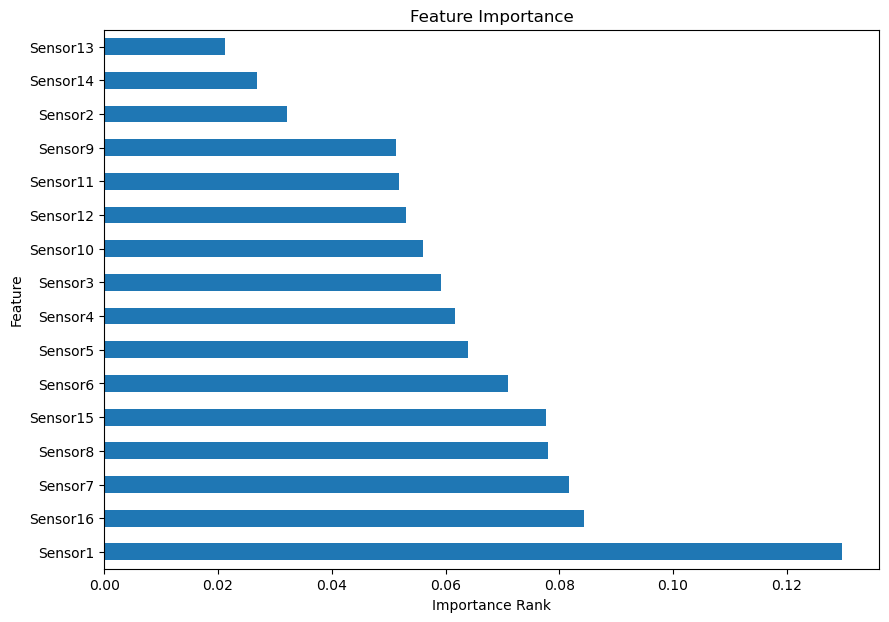

In [15]:
#Borrowed from https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

y_fs = y.astype('int64')
plt.figure(figsize=(10,7))
model = ExtraTreesClassifier()
model.fit(x,y_fs)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')

plt.xlabel('Importance Rank')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



In [6]:
#  80/20 split for training and testing data

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)


ytrain = ytrain.astype('int64')
ytest = ytest.astype('int64')





In [7]:
res = sm.RLM(ytrain, xtrain).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               Response   No. Observations:              3366608
Model:                            RLM   Df Residuals:                  3366592
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 09 May 2023                                         
Time:                        16:30:33                                         
No. Iterations:                    50                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sensor1        0.0004   1.74e-06    222.781      0.000       0.000       0.000
Sensor2    -6.164e-05    2.6e-07   -237.013      0.000   -6.21e-05   -6.11e-05
Sensor3       -0.0041   1.27e-05   -322.462      0.000      -0.004      -0.004
Sensor4        0.0006   1.36e-05     42.459      0.000       0.001       0.001
Sensor5        0.0054   2.29e-05    237.794      0.000       0.005       0.005
Sensor6       -0.0047   1.42e-05   -335.232      0.000      -0.005      -0.005
Sensor7        0.0035   9.35e-06    379.238      0.000       0.004       0.004
Sensor8       -0.0012   1.05e-05   -110.588      0.000      -0.001      -0.001
Sensor9        0.0001    6.4e-06     19.445      0.000       0.000       0.000
Sensor10   -6.319e-05   7.59e-06     -8.325      0.000   -7.81e-05   -4.83e-05
Sensor11       0.0022   9.25e-06    242.230      0.000       0.002       0.002
Sensor12      -0.0033   1.03e-05   -317.818      0.000      -0.003      -0.003
Sensor13       0.0040   1.92e-05    208.165      0.000       0.004       0.004
Sensor14      -0.0025   2.23e-05   -113.074      0.000      -0.003      -0.002
Sensor15       0.0002   4.83e-06     32.227      0.000       0.000       0.000
Sensor16       0.0010   5.22e-06    184.326      0.000       0.001       0.001
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

# Remove Outliers

In [8]:
from scipy import stats
z=stats.zscore(df)

df_clean = df[(z < 3).all(axis=1)]

In [9]:
df_clean

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Response
469,4.68,0.0,0.0,825.86,1728.10,110.42,172.69,554.71,920.14,136.77,174.88,896.13,1202.68,1132.65,1142.75,1430.06,1496.58,735.63,653.17,0
475,4.75,0.0,0.0,835.79,1746.49,130.42,175.22,563.96,948.55,145.14,179.77,895.36,1182.09,1136.29,1146.39,1431.12,1471.46,721.02,651.50,0
476,4.76,0.0,0.0,841.14,1758.63,115.41,171.85,572.69,951.29,144.14,179.10,895.74,1191.87,1132.05,1143.15,1403.33,1487.98,717.28,635.28,0
478,4.78,0.0,0.0,848.61,1762.00,123.08,184.83,586.71,963.99,152.52,205.81,892.07,1174.77,1110.71,1137.50,1424.75,1488.62,715.97,637.30,0
479,4.79,0.0,0.0,870.49,1769.89,122.41,174.71,578.15,961.25,150.17,185.51,877.22,1182.70,1120.97,1125.40,1412.44,1474.67,729.25,627.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208256,42087.51,0.0,0.0,1127.81,105.93,2117.39,2247.58,1207.59,1646.73,2089.97,2262.98,1061.70,1070.47,2570.33,2073.57,709.06,775.36,2513.75,1848.65,0
4208257,42087.52,0.0,0.0,1140.73,96.46,2105.93,2253.69,1216.39,1624.47,2073.57,2246.61,1063.89,1075.26,2580.88,2083.78,698.24,768.93,2511.20,1843.63,0
4208258,42087.53,0.0,0.0,1123.99,107.92,2111.18,2245.63,1215.36,1628.44,2085.45,2271.80,1059.31,1063.49,2583.20,2090.20,709.62,775.73,2510.18,1841.80,0
4208259,42087.54,0.0,0.0,1131.44,111.08,2114.76,2249.54,1197.99,1612.17,2078.32,2272.29,1063.69,1066.08,2578.56,2100.92,716.72,779.14,2508.91,1851.17,0


In [10]:
x_clean=df_clean[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y_clean=df_clean[['Response']]

xtrain_c, xtest_c = x_clean[:int(len(x_clean) * 0.80)], x_clean[int(len(x_clean) * 0.80):] 
ytrain_c, ytest_c = y_clean[:int(len(y_clean) * 0.80)], y_clean[int(len(y_clean) * 0.80):] 

ytrain_c = ytrain_c.astype('int64')
ytest_c = ytest_c.astype('int64')


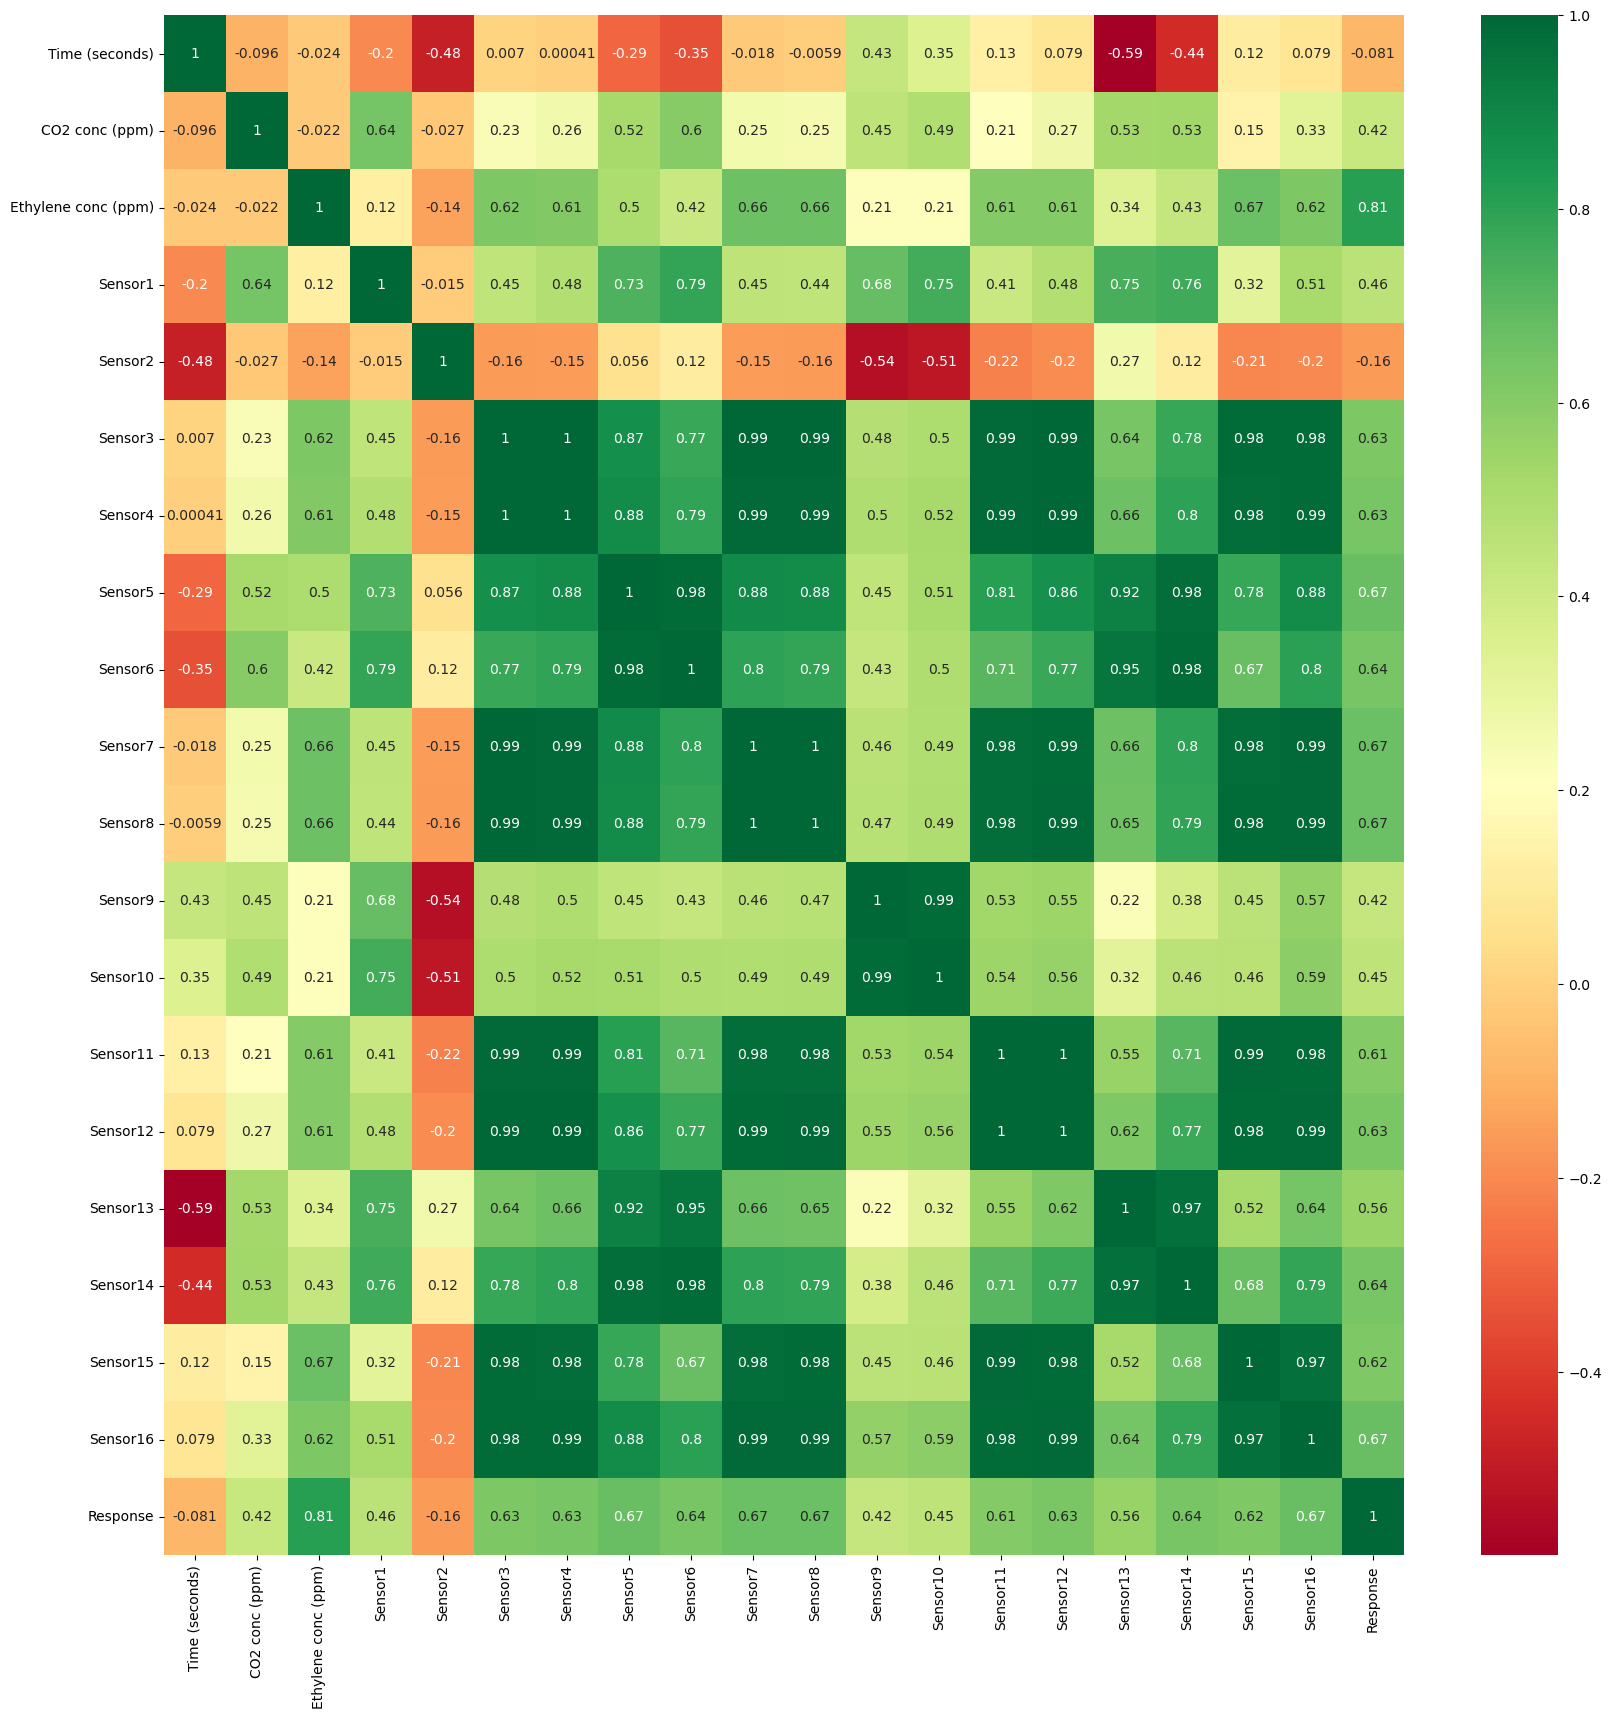

In [11]:
import seaborn as sns


#get correlations of each features in dataset
corrmat = df_clean.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_clean[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
df['Response'].value_counts()

0    1249996
2    1201509
3     966564
1     790192
Name: Response, dtype: int64

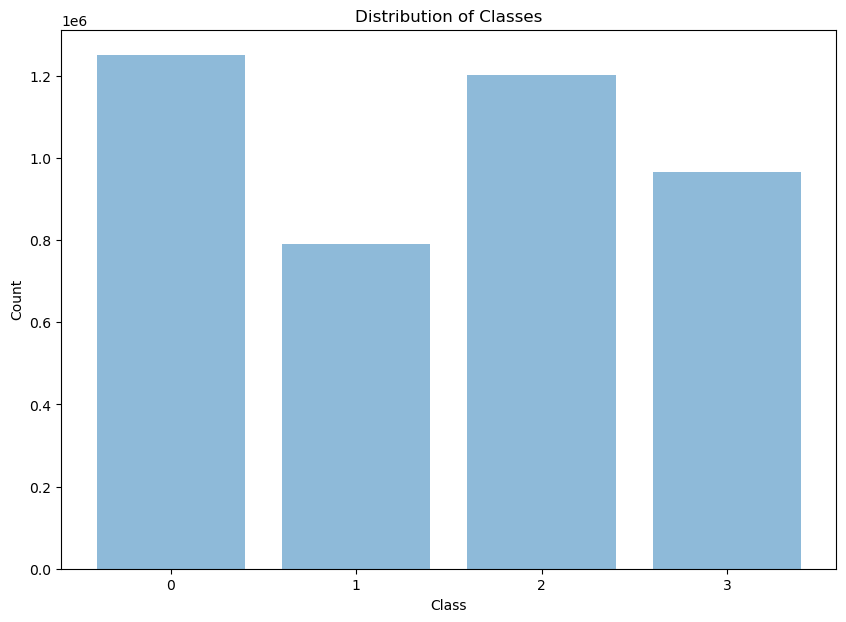

In [13]:
import matplotlib.pyplot as plt
x=[0, 1, 2, 3]
y=[1249996, 790192, 1201509, 966564]


classes = ('0', '1', '2', '3')
plt.figure(figsize=(10,7))
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, classes)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Distribution of Classes')

plt.show()

# Normalize

In [14]:
#Normalize data to be between 0 and 1
from sklearn import preprocessing

x_clean_norm = preprocessing.normalize(x_clean)

xtrain_cn, xtest_cn = x_clean_norm[:int(len(x_clean_norm) * 0.50)], x_clean_norm[int(len(x_clean_norm) * 0.50):] 


# SVM

In [15]:
#Every 1 second
from sklearn.svm import SVC

df_100 = df[df.index % 100 == 0] 

x_100=df_100[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y_100=df_100[['Response']]

xtrain_100, xtest_100 = x_100[:int(len(x_100) * 0.80)], x_100[int(len(x_100) * 0.80):] 
ytrain_100, ytest_100 = y_100[:int(len(y_100) * 0.80)], y_100[int(len(y_100) * 0.80):] 

ytrain_100 = ytrain_100.astype('int64')
ytest_100 = ytest_100.astype('int64')

C_2d_range = [1e-2]
gamma_2d_range = [1e-1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(xtrain_100, ytrain_100)
        classifiers.append((C, gamma, clf))
        
y_svm_100=clf.predict(xtest_100)
        
print('Accuracy Score =', accuracy_score(ytest_100, y_svm_100))
print('MSE =', mean_squared_error(ytest_100, y_svm_100))


/Users/vaibhav/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score = 0.24593085422359512
MSE = 3.629440418201259


In [16]:
#Every 0.1 seconds
df_10 = df[df.index % 10 == 0] 

x_10=df_10[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y_10=df_10[['Response']]

xtrain_10, xtest_10 = x_10[:int(len(x_10) * 0.80)], x_10[int(len(x_10) * 0.80):] 
ytrain_10, ytest_10 = y_10[:int(len(y_10) * 0.80)], y_10[int(len(y_10) * 0.80):] 

ytrain_10 = ytrain_10.astype('int64')
ytest_10 = ytest_10.astype('int64')

C_2d_range = [.1e-2]
gamma_2d_range = [1e-1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(xtrain_10, ytrain_10)
        classifiers.append((C, gamma, clf))

y_svm_10=clf.predict(xtest_10)
        
print('Accuracy Score =', accuracy_score(ytest_10, y_svm_10))
print('MSE =', mean_squared_error(ytest_10, y_svm_10))


/Users/vaibhav/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Cleaned Every 0.1 Seconds
from sklearn.svm import SVC
C_2d_range = [.1e-2]
gamma_2d_range = [1e-1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(xtrain_c_10, ytrain_c_10)
        classifiers.append((C, gamma, clf))

y_svm_c_10=clf.predict(xtest_c_10)
        
print('Accuracy Score =', accuracy_score(ytest_c_10, y_svm_c_10))
print('MSE =', mean_squared_error(ytest_c_10, y_svm_c_10))
